In [2]:
import numpy as np
import pandas as pd

df_propdata = pd.read_csv("../../data/propertydata.csv")

print(df_propdata)

         PID  ST_NUM     ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000   104.0      PUTNAM            Y            3        1  1000
1  100002000   197.0   LEXINGTON            N            3      1.5    --
2  100003000     NaN   LEXINGTON            N          NaN        1   850
3  100004000   201.0    BERKELEY           12            1      NaN   700
4  100005000   203.0    BERKELEY            Y            3        2  1600
5  100006000   207.0    BERKELEY            Y          NaN        1   800
6  100007000     NaN  WASHINGTON          NaN            2   HURLEY   950
7  100008000   213.0     TREMONT            Y            1        1   NaN
8  100009000   215.0     TREMONT            Y           na        2  1800


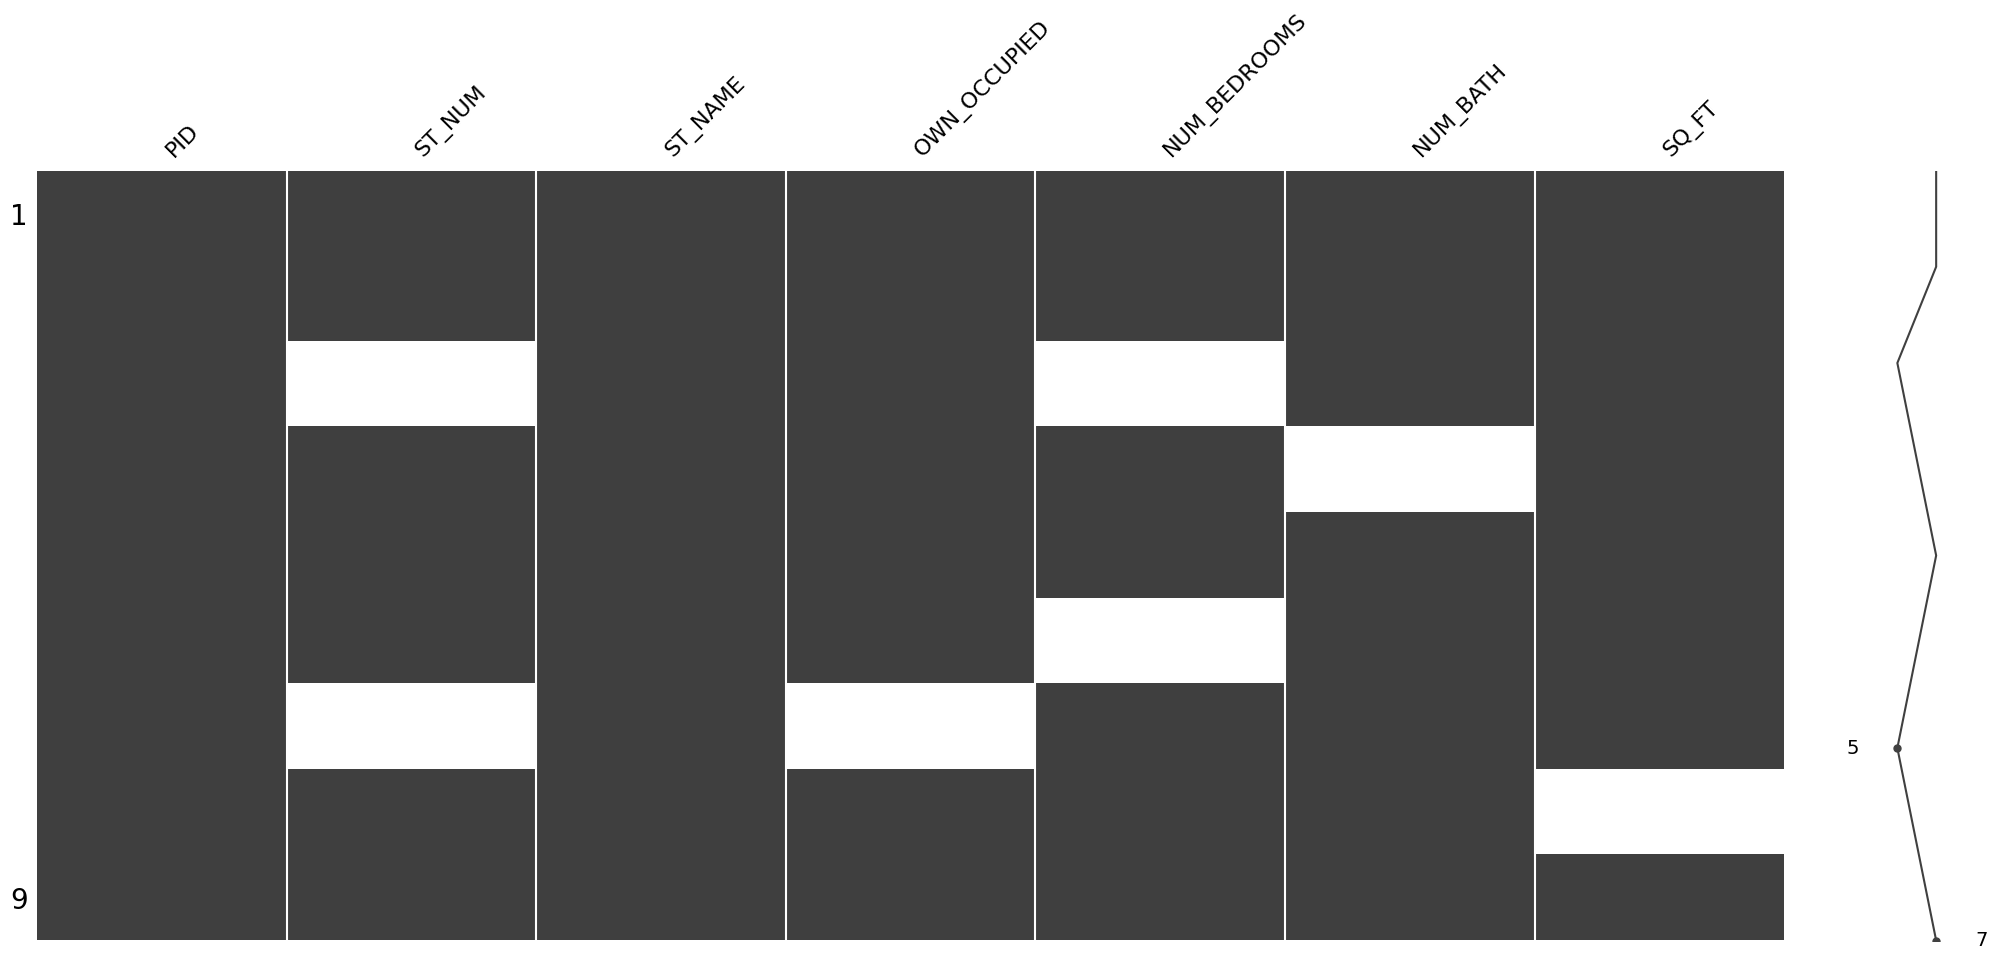

In [7]:
import matplotlib.pyplot as plt
import missingno as msno

# Visualize gaps in data
msno.matrix(df_propdata)
plt.show()

In [8]:
# Read csv file into pandas dataframe, replace missing values with NaN
# Handle NUM_BEDROOMS and SQ_FT
df_propdata_na = pd.read_csv("../data/propertydata.csv", na_values=["na", "--"])

print(df_propdata_na['NUM_BEDROOMS'])
print(df_propdata_na['SQ_FT'])

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    1.0
8    NaN
Name: NUM_BEDROOMS, dtype: float64
0    1000.0
1       NaN
2     850.0
3     700.0
4    1600.0
5     800.0
6     950.0
7       NaN
8    1800.0
Name: SQ_FT, dtype: float64


In [9]:
# Handle OWN_OCCUPIED
cnt = 0
for row in df_propdata_na['OWN_OCCUPIED']:
    try:
       # Try to cast value to int
        int(row)
        # If possible, replace that value
        df_propdata_na.loc[cnt, 'OWN_OCCUPIED'] = np.nan
    except ValueError:
        pass
    cnt += 1

print(df_propdata_na['OWN_OCCUPIED'])

0      Y
1      N
2      N
3    NaN
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object


In [10]:
# Handle NUM_BATH
cnt = 0
for row in df_propdata_na['NUM_BATH']:
    try:
        # Try to cast value to float
        int(row) #float(row)
    except ValueError:
        # If NOT possible, replace that value
        df_propdata_na.loc[cnt, 'NUM_BATH'] = np.nan
    cnt += 1
print(df_propdata_na['NUM_BATH'])

0      1
1    NaN
2      1
3    NaN
4      2
5      1
6    NaN
7      1
8      2
Name: NUM_BATH, dtype: object


In [11]:
# Simulate listwise deletion
print(df_propdata_na.dropna())

         PID  ST_NUM   ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH   SQ_FT
0  100001000   104.0    PUTNAM            Y           3.0        1  1000.0
4  100005000   203.0  BERKELEY            Y           3.0        2  1600.0


In [12]:
type(df_propdata_na['ST_NUM'].values)
df_propdata_na['ST_NUM'].values.reshape(-1,1).shape

(9, 1)

In [13]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df_propdata_na['ST_NUM']=imp_mean.fit_transform(df_propdata_na['ST_NUM'].values.reshape(-1,1))
df_propdata_na['ST_NUM']= df_propdata_na['ST_NUM'].astype(int)
print(df_propdata_na['ST_NUM'])

0    104
1    197
2    191
3    201
4    203
5    207
6    191
7    213
8    215
Name: ST_NUM, dtype: int32


In [32]:
from sklearn.impute import SimpleImputer

# Handle ST_NUM, NUM_BEDROOMS, NUM_BATH, SQ_FT
# Perform mean imputation and down-cast to int to get rid of values like 2.167 bedrooms
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

df_propdata_na['ST_NUM'] = imp_mean.fit_transform(df_propdata_na['ST_NUM'].values.reshape(-1, 1))
df_propdata_na['ST_NUM'] = df_propdata_na['ST_NUM'].astype(int)

df_propdata_na['NUM_BEDROOMS'] = imp_mean.fit_transform(df_propdata_na['NUM_BEDROOMS'].values.reshape(-1, 1))
df_propdata_na['NUM_BEDROOMS'] = df_propdata_na['NUM_BEDROOMS'].astype(int)

df_propdata_na['NUM_BATH'] = imp_mean.fit_transform(df_propdata_na['NUM_BATH'].values.reshape(-1, 1))
df_propdata_na['NUM_BATH'] = df_propdata_na['NUM_BATH'].astype(int)

df_propdata_na['SQ_FT'] = imp_mean.fit_transform(df_propdata_na['SQ_FT'].values.reshape(-1, 1))
df_propdata_na['SQ_FT'] = df_propdata_na['SQ_FT'].astype(int)

print(df_propdata_na)

(9, 1)
         PID  ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS  NUM_BATH  SQ_FT
0  100001000     104      PUTNAM            Y             3         1   1000
1  100002000     197   LEXINGTON            N             3         1   1100
2  100003000     191   LEXINGTON            N             2         1    850
3  100004000     201    BERKELEY          NaN             1         1    700
4  100005000     203    BERKELEY            Y             3         2   1600
5  100006000     207    BERKELEY            Y             2         1    800
6  100007000     191  WASHINGTON          NaN             2         1    950
7  100008000     213     TREMONT            Y             1         1   1100
8  100009000     215     TREMONT            Y             2         2   1800


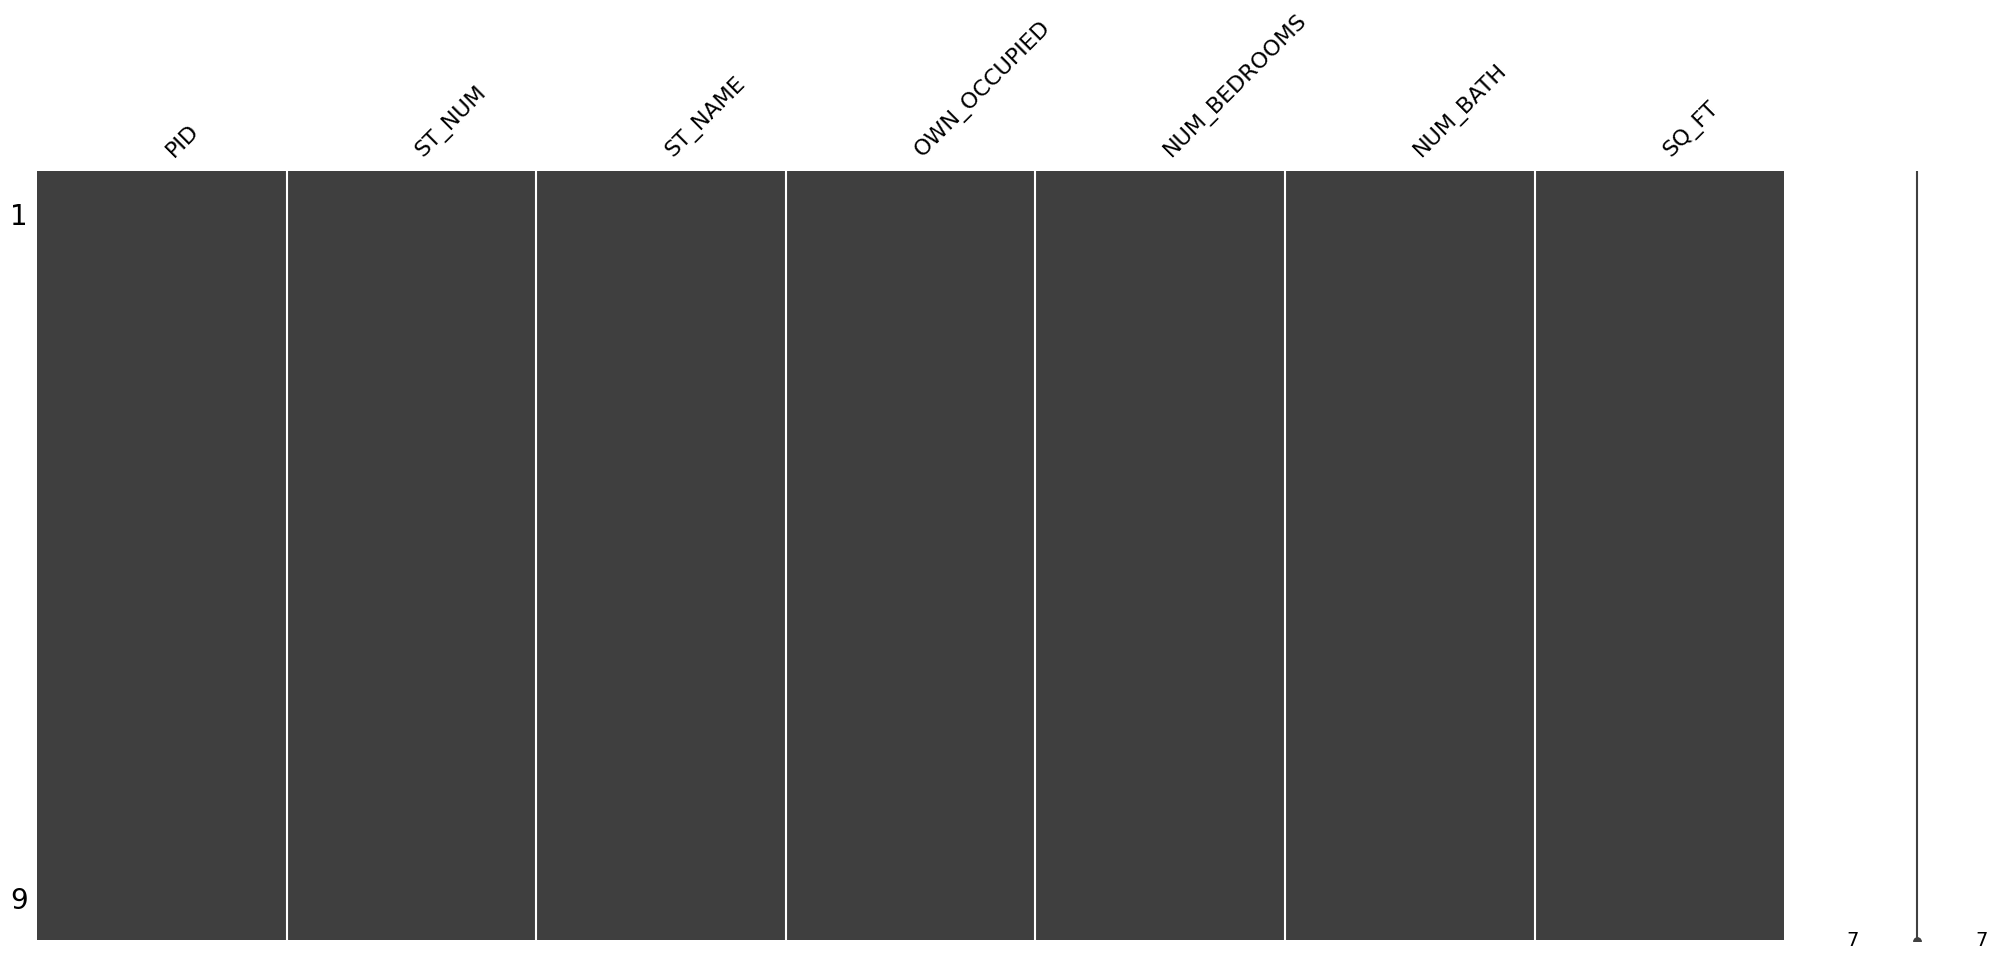

In [35]:
# Handle OWN_OCCUPIED
# Perform most frequent imputation
imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_propdata_na[['OWN_OCCUPIED']] = imp_most_frequent.fit_transform(df_propdata_na[['OWN_OCCUPIED']])

# # Show missing value matrix
msno.matrix(df_propdata_na)
plt.show()